In [331]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

from astropy import constants as const
import warnings
warnings.filterwarnings("ignore")
import math

from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

import scipy
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import multivariate_normal
from scipy.stats import bootstrap
from scipy import interpolate
from scipy.optimize import curve_fit

In [134]:
dataLI = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\STPM_improved_210721.csv",delimiter=",")
dataEA = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\EPA_8_jan_2024.txt",delimiter=",")
planet_name_LI        = list(dataLI["Star"]+" "+dataLI["Planet"])
dataLI["planet_name"] = planet_name_LI

earth_like_rocky  = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\Earth-like Rocky (32.5% Fe+67.5% MgSiO3).txt",delimiter = "\t")

earth_Mass = const.M_earth.value*1000 #g
earth_Radius = const.R_earth.value*100
earth_Volume = 4/3 * math.pi * earth_Radius**3
earth_density = earth_Mass / earth_Volume

In [135]:
# Luque Impoved
planet_id_LI         = dataLI.ID
star_name_LI         = dataLI.Star
planet_letter_LI     = dataLI.Planet

radius_LI            = dataLI.R_Rterra            # [Earth Radius]
radius_unc_up_LI     = dataLI.euR_Rterra          # [Earth Radius] Upper Unc.
radius_unc_low_LI    = dataLI.edR_Rterra          # [Earth Radius] Lower Unc.

mass_LI              = dataLI.M_Mterra            # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up_LI       = dataLI.euM_Mterra          # [Earth Mass] Upper Unc.
mass_unc_low_LI      = dataLI.edM_Mterra          # [Earth Mass] Lower Unc.

density_LI           = dataLI[dataLI.columns[32]]  # [g/cm**3]
density_unc_up_LI    = dataLI[dataLI.columns[33]]  # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_LI   = dataLI[dataLI.columns[34]]  # [g/cm**3] Planet Density Lower Unc
star_eff_LI          = dataLI.Teff_K
pl_eq_LI             = dataLI.Teq_K                # [K] Equilibrium Temperature

# Exoplanet Archive
planet_name_EA       = dataEA.pl_name
planet_id_EA         = list(range(0,len(planet_name_EA)))

radius_EA            = dataEA.pl_rade            # [Earth Radius]
period_EA            = dataEA.pl_orbper          # [days]
radius_unc_up_EA     = dataEA.pl_radeerr1        # [Earth Radius] Upper Unc.
radius_unc_low_EA    = dataEA.pl_radeerr2        # [Earth Radius] Lower Unc.
mass_EA              = dataEA.pl_bmasse          # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]

mass_unc_up_EA       = dataEA.pl_bmasseerr1      # [Earth Mass] Upper Unc.
mass_unc_low_EA      = dataEA.pl_bmasseerr2      # [Earth Mass] Lower Unc.

density_EA           = dataEA.pl_dens            # [g/cm**3]
density_unc_up_EA    = dataEA.pl_denserr1        # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_EA   = dataEA.pl_denserr2        # [g/cm**3] Planet Density Lower Unc. 
st_spectype_EA       = dataEA.st_spectype        # Spectral type of star
pl_eq_EA             = dataEA.pl_eqt             # [K] Equilibrium Temperature
st_eff_EA            = dataEA.st_teff            # Star effective temprature
st_eff_up_EA         = dataEA.st_tefferr1        # Star upper err effective temprature
st_eff_low_EA        = dataEA.st_tefferr2        # Star lower err effective temprature
disc_year_EA         = dataEA.disc_year


In [370]:
planets = ["K2-146 b",'TRAPPIST-1 h', 'TRAPPIST-1 d', 'TRAPPIST-1 e', 'TRAPPIST-1 f', 'TRAPPIST-1 g', 'TRAPPIST-1 c', 'TRAPPIST-1 b', 'GJ 1132 b', 'TOI-270 b', 'GJ 3053 c', 'GJ 1252 b', 'GJ 357 b', 'LTT 3780 b', 'LHS 1478 b', 'GJ 486 b', 'GJ 3473 b', 'CD-60 8051 b', 'L 98-59 c', 'L 98-59 d', 'GJ 3053 b', 'TOI-270 d', 'TOI-776 b', 'TOI-1634 b', 'TOI-1685 b', 'TOI-1235 b', 'K2-146 c', 'LTT 3780 c', 'TOI-270 c', 'K2-18 b', 'TOI-269 b', 'GJ 1214 b', 'K2-25 b', 'TOI-1231 b']
planet1      = []; planet_i1       = []; planet_eq1   = []
disc_year1   = []; st_eff1         = []; st_type1     = []
radius1      = []; radius_up1      = []; radius_low1  = []
mass1        = []; mass_up1        = []; mass_low1    = []
density1     = []; density_up1     = []; density_low1 = []

for i in range(0,len(planet_name_LI)):
    if planet_name_LI[i] in planets:
        planet1.append(planet_name_LI[i]); planet_eq1.append(pl_eq_LI[i]);          st_eff1.append(star_eff_LI[i]);
        radius1.append(radius_LI[i]);      radius_up1.append(radius_unc_up_LI[i]);  radius_low1.append(radius_unc_low_LI[i]);
        mass1.append(mass_LI[i]);          mass_up1.append(mass_unc_up_LI[i]);      mass_low1.append(mass_unc_low_LI[i]);
        density1.append(density_LI[i]);    density_up1.append(density_unc_up_LI[i]); density_low1.append(density_unc_low_LI[i]);

In [371]:
planet2      = []; planet_i2       = []; planet_eq2   = []
disc_year2   = []; st_eff2         = []; st_type2     = []
radius2      = []; radius_up2      = []; radius_low2  = []
mass2        = []; mass_up2        = []; mass_low2    = []
density2     = []; density_up2     = []; density_low2 = []
other_names = ['LHS 1140 c' ,'L 168-9 b', 'L 168-9 c']

for i in range(0,len(planet_name_EA)):
    if ((radius_unc_up_EA[i] + radius_unc_up_EA[i])*0.5) / radius_EA[i] < 0.08 and radius_EA[i]<4:
        if "M" in str(st_spectype_EA[i]) or st_eff_EA[i] < 3997:
                if ((mass_unc_up_EA[i] + mass_unc_up_EA[i])*0.5) / mass_EA[i] < 0.25 and math.isnan(density_unc_low_EA[i]) == False:
                    if planet_name_EA[i] not in planet_name_LI and planet_name_EA[i] not in other_names:
                        st_eff2.append(st_eff_EA[i])
                        planet_eq2.append(pl_eq_EA[i]); planet2.append(planet_name_EA[i]); disc_year2.append(disc_year_EA[i])
                        radius2.append(dataEA.pl_rade[i]); radius_up2.append(dataEA.pl_radeerr1[i]); radius_low2.append(dataEA.pl_radeerr2[i])
                        density2.append(dataEA.pl_dens[i]); density_up2.append(dataEA.pl_denserr1[i]); density_low2.append(dataEA.pl_denserr2[i])
                        mass2.append(dataEA.pl_bmasse[i]); mass_up2.append(dataEA.pl_bmasseerr1[i]);  mass_low2.append(dataEA.pl_bmasseerr2[i])
                        st_type2.append(st_spectype_EA[i]);

In [369]:
st_type2

['M2 V', 'M1.0 V', 'M1.0 V', 'M1.5 V', 'M0 V', 'M0 V']

In [372]:
earth_like_rocky_mass_g        = earth_Mass*np.array(earth_like_rocky["Mass"])
earth_like_rocky_radius_cm     = earth_Radius*np.array(earth_like_rocky["Radius"])
earth_like_rocky_density_g_cm3 = (earth_like_rocky_mass_g) / ((4/3)*(np.pi)*(np.power(earth_like_rocky_radius_cm,3))   ) 

def rocky_density(mass):
    x_points  = earth_like_rocky["Mass"]
    y_points  = earth_like_rocky_density_g_cm3
    tck       = interpolate.splrep(x_points, y_points)
    return interpolate.splev(mass, tck).tolist()

def rocky_density2(mass):
    x_points  = earth_like_rocky["Mass"]
    y_points  = earth_like_rocky_density_g_cm3/earth_like_rocky_density_g_cm3
    tck       = interpolate.splrep(x_points, y_points)
    return interpolate.splev(mass, tck).tolist()

def h20model_density(mass):
    x_points  = H20_50_500K["Mass"]
    y_points  = H20_50_500K_density_g_cm3/rocky_density(H20_50_500K["Mass"])
    tck       = interpolate.splrep(x_points, y_points)
    return interpolate.splev(mass, tck).tolist()

In [373]:
mass    = np.concatenate((mass1, mass2));       mass_up     = np.concatenate((mass_up1, mass_up2));       mass_low     = np.concatenate((mass_low1, mass_low2));
radius  = np.concatenate((radius1, radius2));   radius_up   = np.concatenate((radius_up1, radius_up2));   radius_low   = np.concatenate((radius_low1, radius_low2));
density = np.concatenate((np.array(density1) / rocky_density(mass1), np.array(density2)/ rocky_density(mass2))); density_up  = np.concatenate((np.array(density_up1)/ rocky_density(mass1), np.array(density_up2)/ rocky_density(mass2))); density_low  = np.concatenate((np.array(density_low1)/ rocky_density(mass1),np.array(density_low2)/ rocky_density(mass2)));

planet_temp = np.concatenate((planet_eq1, planet_eq2));
planet_name = np.concatenate((planet1,    planet2));

mass_err    = [np.abs(mass_low),mass_up]
radius_err  = [np.abs(radius_low),radius_up]
density_err = [np.abs(density_low),density_up]

mass10      = np.log10(mass)
mass10_up   = np.log10(mass + mass_up) - np.log10(mass)
mass10_low  = np.log10(mass + np.abs(mass_low)) - np.log10(mass)
mass10_err  = [mass10_low,mass10_up]

model_rocky_density = np.array(rocky_density(np.array(earth_like_rocky["Mass"])))
model_rocky_mass    = np.array(earth_like_rocky["Mass"])
model_rocky10_mass  = np.array(np.log10(np.array(earth_like_rocky["Mass"])))
model_rocky_radius  = np.array(earth_like_rocky["Radius"])

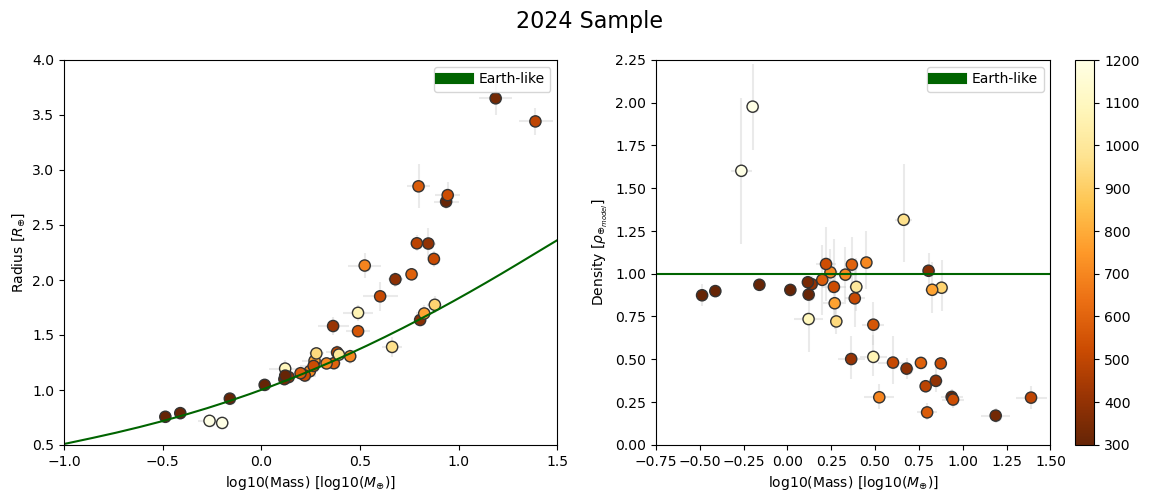

In [374]:
fig, ax = plt.subplots(figsize=(14,5))
fig.suptitle('2024 Sample', fontsize=16)

plt.subplot(1, 2, 1)
norm = mcolors.Normalize(vmin=300, vmax=1200)
cmap = plt.cm.get_cmap('YlOrBr_r')
plt.plot(np.log10(list(earth_like_rocky["Mass"])),list(earth_like_rocky["Radius"]),"-",color = "Darkgreen",label = "Earth-like")
plt.scatter(mass10, radius, c=planet_temp, cmap=cmap, norm=norm, marker='o',s=65, edgecolors='0.2')   
plt.errorbar(mass10, radius,xerr = mass10_err, yerr = radius_err,fmt='.',markersize = 15,color = "0.8",zorder=-32,alpha = 0.4)

plt.xlim(-1,1.5)
plt.ylim(0.5,4)
plt.xlabel("log10(Mass) [log10($M_{\oplus})]$")
plt.ylabel("Radius $[R_{\oplus}]$")
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.subplot(1, 2, 2)
plt.scatter(mass10, density, c=planet_temp, cmap=cmap, norm=norm, marker='o',s=65, edgecolors='0.2')   
plt.errorbar(mass10, density,xerr = mass10_err, yerr = density_err,fmt='.',markersize = 15,color = "0.8",zorder=-32,alpha = 0.4)
plt.plot(np.log10(earth_like_rocky["Mass"]),np.array(rocky_density(list(earth_like_rocky["Mass"]))) / np.array(rocky_density(list(earth_like_rocky["Mass"]))),"-",color = "Darkgreen",label = "Earth-like")

plt.xlim(-0.75,1.5)
plt.ylim(0,2.25)
plt.xlabel("log10(Mass) [log10($M_{\oplus})]$")
plt.ylabel("Density $[ρ_{ \oplus_{model}}]$")
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)
cbar = plt.colorbar()

In [306]:
df = pd.DataFrame({'Mass10': mass10, 'Density_norm': density})

esps   = np.linspace(0.1,0.4,1000) 
SS4 = []; CH4 = []; SS5 = []; CH5 = []; SS6 = []; CH6 = []; SS7 = []; CH7 = []; SS8 = []; CH8 = []; SS9 = []; CH9 = [];  SS10 = []; CH10 = []

for i in range(0,len(esps)):
    dbscan = DBSCAN(eps=esps[i], min_samples=4); labels = dbscan.fit_predict(df)
    if -1 in labels and 0 in labels and 1 in labels:
        silhouette = silhouette_score(df, labels); ch_score = calinski_harabasz_score(df, labels)
        SS4.append(silhouette); CH4.append(ch_score)
    else:
        SS4.append(np.nan); CH4.append(np.nan)
        
for i in range(0,len(esps)):
    dbscan = DBSCAN(eps=esps[i], min_samples=5); labels = dbscan.fit_predict(df)
    if -1 in labels and 0 in labels and 1 in labels:
        silhouette = silhouette_score(df, labels); ch_score = calinski_harabasz_score(df, labels)
        SS5.append(silhouette); CH5.append(ch_score)
    else:
        SS5.append(np.nan); CH5.append(np.nan)

for i in range(0,len(esps)):
    dbscan = DBSCAN(eps=esps[i], min_samples=6); labels = dbscan.fit_predict(df)
    if -1 in labels and 0 in labels and 1 in labels:
        silhouette = silhouette_score(df, labels); ch_score = calinski_harabasz_score(df, labels)
        SS6.append(silhouette); CH6.append(ch_score)
    else:
        SS6.append(np.nan); CH6.append(np.nan)
        
for i in range(0,len(esps)):
    dbscan = DBSCAN(eps=esps[i], min_samples=7); labels = dbscan.fit_predict(df)
    if -1 in labels and 0 in labels and 1 in labels:
        silhouette = silhouette_score(df, labels); ch_score = calinski_harabasz_score(df, labels)
        SS7.append(silhouette); CH7.append(ch_score)
    else:
        SS7.append(np.nan); CH7.append(np.nan)
        
for i in range(0,len(esps)):
    dbscan = DBSCAN(eps=esps[i], min_samples=8); labels = dbscan.fit_predict(df)
    if -1 in labels and 0 in labels and 1 in labels:
        silhouette = silhouette_score(df, labels); ch_score = calinski_harabasz_score(df, labels)
        SS8.append(silhouette); CH8.append(ch_score)
    else:
        SS8.append(np.nan); CH8.append(np.nan)

for i in range(0,len(esps)):
    dbscan = DBSCAN(eps=esps[i], min_samples=9); labels = dbscan.fit_predict(df)
    if -1 in labels and 0 in labels and 1 in labels:
        silhouette = silhouette_score(df, labels); ch_score = calinski_harabasz_score(df, labels)
        SS9.append(silhouette); CH9.append(ch_score)
    else:
        SS9.append(np.nan); CH9.append(np.nan)
        
for i in range(0,len(esps)):
    dbscan = DBSCAN(eps=esps[i], min_samples=10); labels = dbscan.fit_predict(df)
    if -1 in labels and 0 in labels and 1 in labels:
        silhouette = silhouette_score(df, labels); ch_score = calinski_harabasz_score(df, labels)
        SS10.append(silhouette); CH10.append(ch_score)
    else:
        SS10.append(np.nan); CH10.append(np.nan)

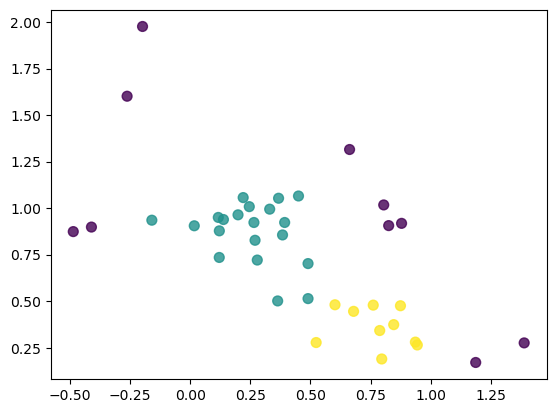

In [284]:
dbscan = DBSCAN(eps=0.3, min_samples=9)
labels = dbscan.fit_predict(df)
plt.scatter(df['Mass10'],df['Density_norm'], c=labels, cmap='viridis', s=50, alpha=0.8)


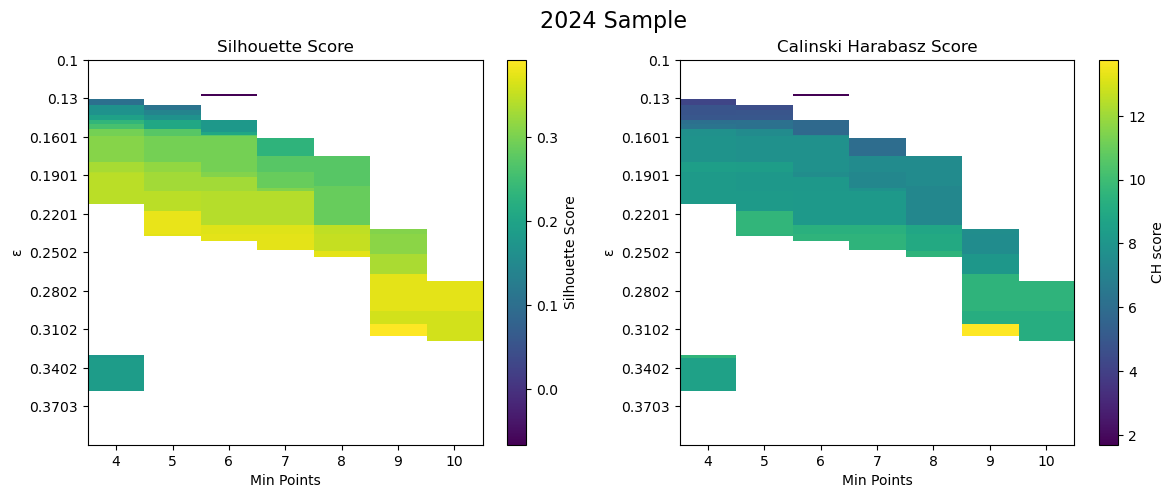

In [311]:
fig, ax = plt.subplots(figsize=(14,5))
fig.suptitle('2024 Sample', fontsize=16)

plt.subplot(1, 2, 1)
data = np.array([SS4,SS5, SS6, SS7,SS8,SS9,SS10]).T.astype(float)  # Convert to float
plt.imshow(data, cmap='viridis', aspect='auto', interpolation='none')

cbar = plt.colorbar()
cbar.set_label("Silhouette Score")

plt.xticks(np.arange(7), ['4','5', '6', '7','8','9','10'])
plt.yticks(np.arange(0, len(esps), 100), np.round(esps[::100], 4))  # Plot every 10 ticks
plt.ylabel('ε')
plt.xlabel('Min Points')
plt.title('Silhouette Score')

plt.subplot(1, 2, 2)
data = np.array([CH4,CH5, CH6, CH7,CH8,CH9,CH10]).T.astype(float)  # Convert to float
plt.imshow(data, cmap='viridis', aspect='auto', interpolation='none')
cbar = plt.colorbar()
cbar.set_label("CH score")
plt.xticks(np.arange(7), ['4','5', '6', '7','8','9','10'])
plt.yticks(np.arange(0, len(esps), 100), np.round(esps[::100], 4))  # Plot every 10 ticks
plt.ylabel('ε')
plt.xlabel('Min Points')
plt.title('Calinski Harabasz Score')
plt.show()

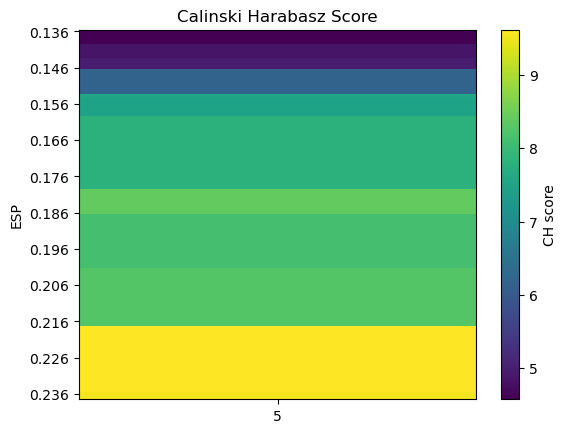

In [250]:
data = np.array(CH7).reshape(-1, 1)
plt.imshow(data, cmap='viridis', aspect='auto', interpolation='none')

cbar = plt.colorbar()
cbar.set_label("CH score")

plt.xticks(np.arange(1), ['5'])
plt.yticks(np.arange(0, len(final_esps5), 10), np.round(final_esps5[::10],4))  # Plot every 50 ticks
plt.ylabel('ESP')

plt.title('Calinski Harabasz Score')
plt.show()


Silhouette Score: 0.29581489082441925
Calinski-Harabasz Score: 3.7256973501083603


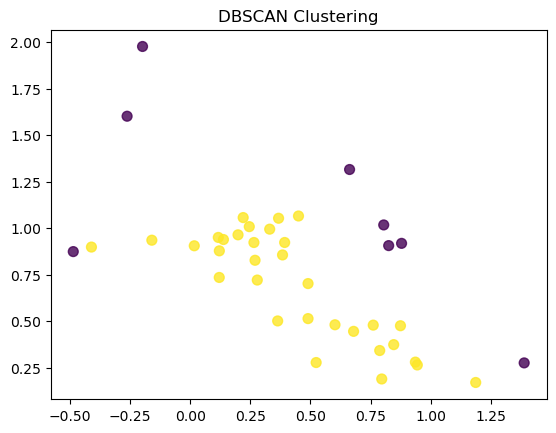

In [425]:
df = pd.DataFrame({'Mass10': mass10, 'Density_norm': density})
dbscan = DBSCAN(eps=0.29, min_samples=5)
labels = dbscan.fit_predict(df)
if -1 in labels and 0 in labels:
    plt.scatter(df['Mass10'],df['Density_norm'], c=labels, cmap='viridis', s=50, alpha=0.8)
    plt.title('DBSCAN Clustering')
    silhouette_avg = silhouette_score(df, labels)
    print(f"Silhouette Score: {silhouette_avg}")
    ch_score = calinski_harabasz_score(df, labels)
    print(f"Calinski-Harabasz Score: {ch_score}")
elif -1 in labels:
    print("No clusters detected")
else:
    print("All planets 1 big cluster")

In [313]:
df = pd.DataFrame({'Mass10': mass10, 'Density_norm': density})

x     = mass10[0]
x_low = mass10_low[0]
x_up  = mass10_up[0]


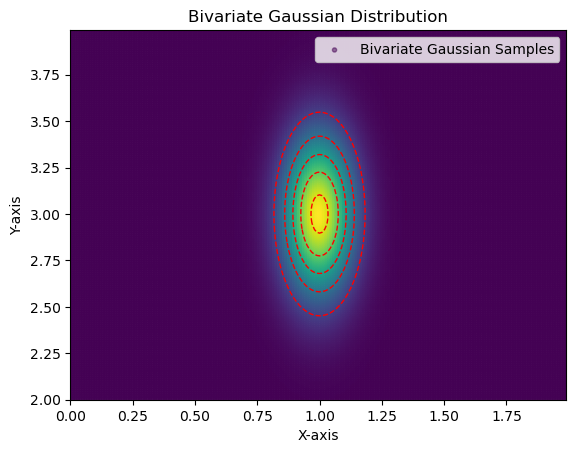

In [319]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mean_point = np.array([1, 3])

uncertainty_x = np.array([0.1, 0.2])
uncertainty_y = np.array([0.3, 0.4])

covariance_matrix = np.diag([uncertainty_x[0]**2, uncertainty_y[0]**2])

x, y = np.mgrid[0:2:.01, 2:4:.01]
pos = np.dstack((x, y))

bivariate_gaussian = multivariate_normal(mean=mean_point, cov=covariance_matrix)

pdf = bivariate_gaussian.pdf(pos)

plt.scatter(pos[:, :, 0], pos[:, :, 1], c=pdf, cmap='viridis', marker='.', alpha=0.5, label='Bivariate Gaussian Samples')
plt.contour(x, y, pdf, levels=5, colors='r', linewidths=1, linestyles='dashed', label='Bivariate Gaussian Contours')

plt.xlabel('X-axis'); plt.ylabel('Y-axis')
plt.title('Bivariate Gaussian Distribution')
plt.legend(); plt.show()


(0.0, 2.25)

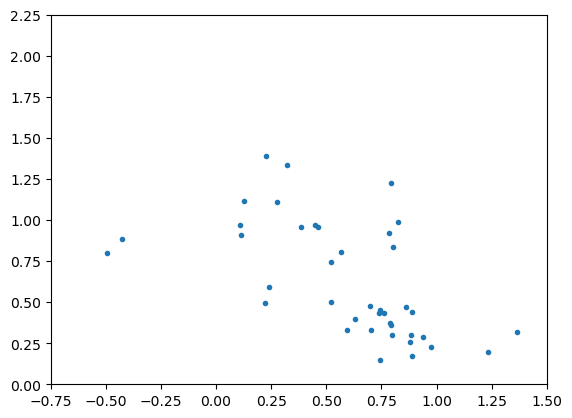

In [428]:
random_numbers = np.random.choice(len(mass), len(mass), replace=True)
xs = []; ys = []
for i in range(0,len(mass)):
    rn = random_numbers[i]
    x     = mass10[rn]; x_low = mass10_low[rn]; x_up  = mass10_up[rn]
    y     = density[rn]; y_low = density_low[rn]; y_up  = density_up[rn]
    mean_point = np.array([x, y])
    uncertainty_x = np.array([x_low, x_up]);  uncertainty_y = np.array([y_low, y_up]);
    covariance_matrix = np.diag([uncertainty_x[0]**2, uncertainty_y[0]**2])
    bivariate_gaussian = multivariate_normal(mean=mean_point, cov=covariance_matrix)
    random_datapoint = bivariate_gaussian.rvs()
    xs.append(random_datapoint[0]); ys.append(random_datapoint[1])


In [429]:
df = pd.DataFrame({'Mass10': xs, 'Density_norm': ys})

esps   = np.linspace(0.1,0.4,100) 
SS3 = []; CH3 = []; SS4 = []; CH4 = []; SS5 = []; CH5 = []; SS6 = []; CH6 = []; SS7 = []; CH7 = []; SS8 = []; CH8 = []; SS9 = []; CH9 = [];  SS10 = []; CH10 = []

for i in range(0,len(esps)):
    dbscan = DBSCAN(eps=esps[i], min_samples=3); labels = dbscan.fit_predict(df)
    if -1 in labels and 0 in labels and 1 in labels:
        silhouette = silhouette_score(df, labels); ch_score = calinski_harabasz_score(df, labels)
        SS3.append(silhouette); CH3.append(ch_score)
    else:
        SS3.append(np.nan); CH3.append(np.nan)
    
for i in range(0,len(esps)):
    dbscan = DBSCAN(eps=esps[i], min_samples=4); labels = dbscan.fit_predict(df)
    if -1 in labels and 0 in labels and 1 in labels:
        silhouette = silhouette_score(df, labels); ch_score = calinski_harabasz_score(df, labels)
        SS4.append(silhouette); CH4.append(ch_score)
    else:
        SS4.append(np.nan); CH4.append(np.nan)
        
for i in range(0,len(esps)):
    dbscan = DBSCAN(eps=esps[i], min_samples=5); labels = dbscan.fit_predict(df)
    if -1 in labels and 0 in labels and 1 in labels:
        silhouette = silhouette_score(df, labels); ch_score = calinski_harabasz_score(df, labels)
        SS5.append(silhouette); CH5.append(ch_score)
    else:
        SS5.append(np.nan); CH5.append(np.nan)

for i in range(0,len(esps)):
    dbscan = DBSCAN(eps=esps[i], min_samples=6); labels = dbscan.fit_predict(df)
    if -1 in labels and 0 in labels and 1 in labels:
        silhouette = silhouette_score(df, labels); ch_score = calinski_harabasz_score(df, labels)
        SS6.append(silhouette); CH6.append(ch_score)
    else:
        SS6.append(np.nan); CH6.append(np.nan)
        
for i in range(0,len(esps)):
    dbscan = DBSCAN(eps=esps[i], min_samples=7); labels = dbscan.fit_predict(df)
    if -1 in labels and 0 in labels and 1 in labels:
        silhouette = silhouette_score(df, labels); ch_score = calinski_harabasz_score(df, labels)
        SS7.append(silhouette); CH7.append(ch_score)
    else:
        SS7.append(np.nan); CH7.append(np.nan)
        
for i in range(0,len(esps)):
    dbscan = DBSCAN(eps=esps[i], min_samples=8); labels = dbscan.fit_predict(df)
    if -1 in labels and 0 in labels and 1 in labels:
        silhouette = silhouette_score(df, labels); ch_score = calinski_harabasz_score(df, labels)
        SS8.append(silhouette); CH8.append(ch_score)
    else:
        SS8.append(np.nan); CH8.append(np.nan)

for i in range(0,len(esps)):
    dbscan = DBSCAN(eps=esps[i], min_samples=9); labels = dbscan.fit_predict(df)
    if -1 in labels and 0 in labels and 1 in labels:
        silhouette = silhouette_score(df, labels); ch_score = calinski_harabasz_score(df, labels)
        SS9.append(silhouette); CH9.append(ch_score)
    else:
        SS9.append(np.nan); CH9.append(np.nan)
        
for i in range(0,len(esps)):
    dbscan = DBSCAN(eps=esps[i], min_samples=10); labels = dbscan.fit_predict(df)
    if -1 in labels and 0 in labels and 1 in labels:
        silhouette = silhouette_score(df, labels); ch_score = calinski_harabasz_score(df, labels)
        SS10.append(silhouette); CH10.append(ch_score)
    else:
        SS10.append(np.nan); CH10.append(np.nan)


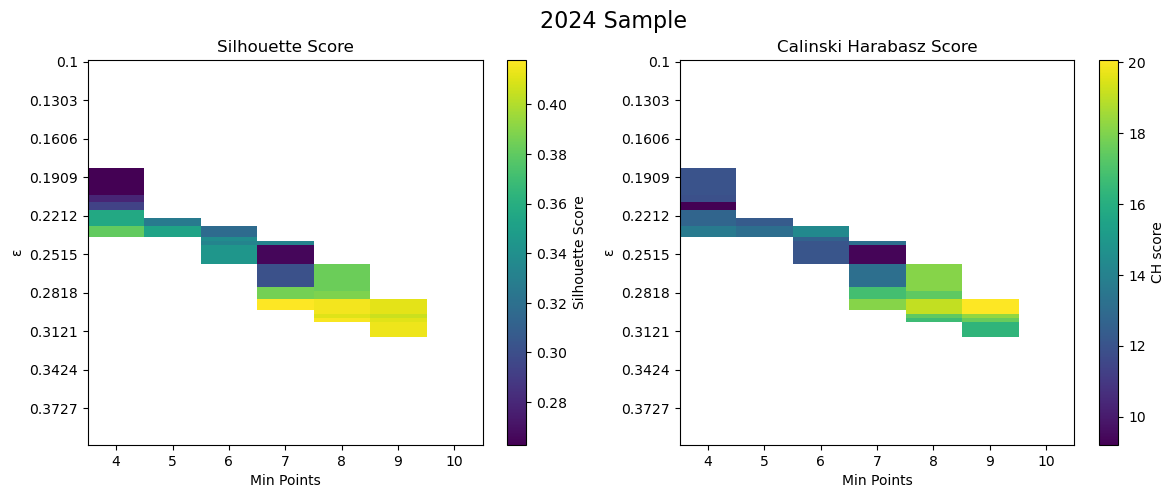

In [430]:
fig, ax = plt.subplots(figsize=(14,5))
fig.suptitle('2024 Sample', fontsize=16)

plt.subplot(1, 2, 1)
data = np.array([SS4,SS5, SS6, SS7,SS8,SS9,SS10]).T.astype(float)  # Convert to float
plt.imshow(data, cmap='viridis', aspect='auto', interpolation='none')

cbar = plt.colorbar()
cbar.set_label("Silhouette Score")

plt.xticks(np.arange(8), ['3','4','5', '6', '7','8','9','10'])
plt.yticks(np.arange(0, len(esps), 10), np.round(esps[::10], 4))  # Plot every 10 ticks
plt.ylabel('ε')
plt.xlabel('Min Points')
plt.title('Silhouette Score')

plt.subplot(1, 2, 2)
data = np.array([CH4,CH5, CH6, CH7,CH8,CH9,CH10]).T.astype(float)  # Convert to float
plt.imshow(data, cmap='viridis', aspect='auto', interpolation='none')
cbar = plt.colorbar()
cbar.set_label("CH score")
plt.xticks(np.arange(8), ['3','4','5', '6', '7','8','9','10'])
plt.yticks(np.arange(0, len(esps), 10), np.round(esps[::10], 4))  # Plot every 10 ticks
plt.ylabel('ε')
plt.xlabel('Min Points')
plt.title('Calinski Harabasz Score')
plt.show()

0.2878787878787879

In [426]:
df = pd.DataFrame({'Mass10': xs, 'Density_norm': ys})


Silhouette Score: 0.41792235831519653
Calinski-Harabasz Score: 18.1092212589516


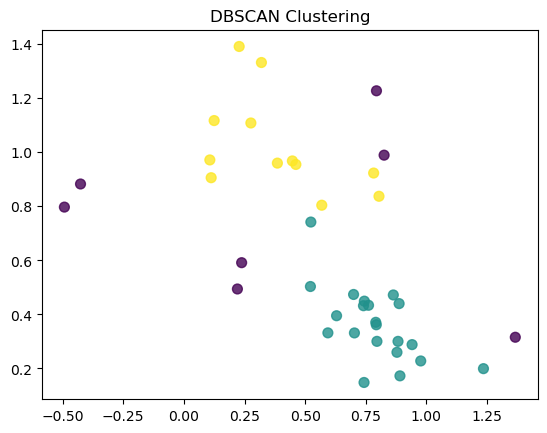

In [435]:
dbscan = DBSCAN(eps=esps[max_index], min_samples=7)
labels = dbscan.fit_predict(df)
if -1 in labels and 0 in labels:
    plt.scatter(df['Mass10'],df['Density_norm'], c=labels, cmap='viridis', s=50, alpha=0.8)
    plt.title('DBSCAN Clustering')
    silhouette_avg = silhouette_score(df, labels)
    print(f"Silhouette Score: {silhouette_avg}")
    ch_score = calinski_harabasz_score(df, labels)
    print(f"Calinski-Harabasz Score: {ch_score}")
elif -1 in labels:
    print("No clusters detected")
else:
    print("All planets 1 big cluster")

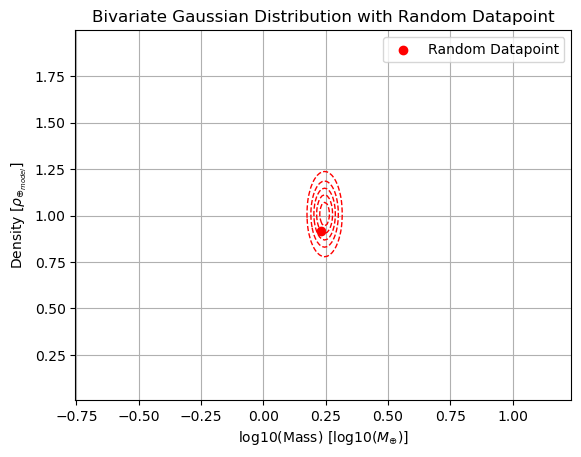

In [356]:
x     = mass10[1]
x_low = mass10_low[1]
x_up  = mass10_up[1]

y     = density[1]
y_low = density_low[1]
y_up  = density_up[1]
mean_point = np.array([x, y])
uncertainty_x = np.array([x_low, x_up]); 
uncertainty_y = np.array([y_low, y_up]);
covariance_matrix = np.diag([uncertainty_x[0]**2, uncertainty_y[0]**2])
bivariate_gaussian = multivariate_normal(mean=mean_point, cov=covariance_matrix)

random_datapoint = bivariate_gaussian.rvs()
plt.scatter(random_datapoint[0], random_datapoint[1], color='red', marker='o', label='Random Datapoint')

x, y = np.mgrid[mean_point[0]-1:mean_point[0]+1:.01, mean_point[1]-1:mean_point[1]+1:.01]
pos = np.dstack((x, y))
pdf = bivariate_gaussian.pdf(pos)
plt.contour(x, y, pdf, levels=5, colors='r', linewidths=1, linestyles='dashed', label='Bivariate Gaussian Contours')

plt.xlabel("log10(Mass) [log10($M_{\oplus})]$")
plt.ylabel("Density $[ρ_{ \oplus_{model}}]$")
plt.grid()
plt.title('Bivariate Gaussian Distribution with Random Datapoint')
plt.legend()


# Bootstrap Full


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (8).

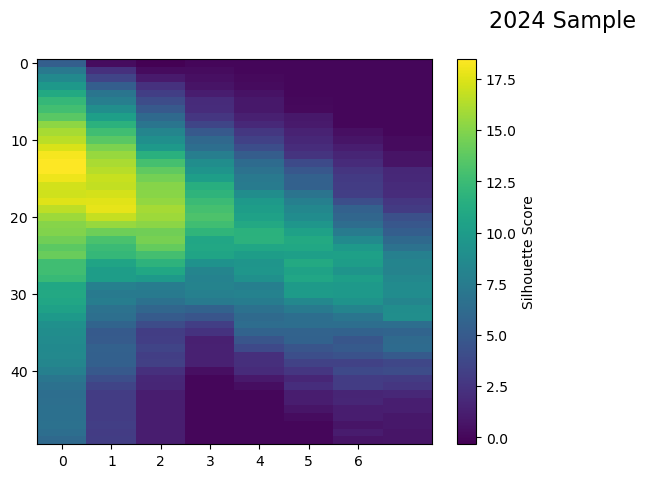

In [572]:
esps   = np.linspace(0.1,0.4,50) 
SS_save = {}
CH_save = {}
np.random.seed()
for j in range(0,50):
    random_numbers = np.random.choice(len(mass), len(mass), replace=True)
    xs = []; ys = []
    for i in range(0,len(mass)):
        rn = random_numbers[i]
        x     = mass10[rn]; x_low = mass10_low[rn]; x_up  = mass10_up[rn]
        y     = density[rn]; y_low = density_low[rn]; y_up  = density_up[rn]
        mean_point = np.array([x, y])
        uncertainty_x = np.array([x_low, x_up]);  uncertainty_y = np.array([y_low, y_up]);
        covariance_matrix = np.diag([uncertainty_x[0]**2, uncertainty_y[0]**2])
        bivariate_gaussian = multivariate_normal(mean=mean_point, cov=covariance_matrix)
        random_datapoint = bivariate_gaussian.rvs()
        xs.append(random_datapoint[0]); ys.append(random_datapoint[1])
        
        df = pd.DataFrame({'Mass10': xs, 'Density_norm': ys})
        
        min_samples_range = range(3, 11)

    SS_dict = {}
    CH_dict = {}
    for min_samples in min_samples_range:
        SS_key = f"SS{min_samples}"
        CH_key = f"CH{min_samples}"
        SS_dict[SS_key] = []
        CH_dict[CH_key] = []
        for eps_value in esps:
            dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
            labels = dbscan.fit_predict(df)

            if -1 in labels and 0 in labels and 1 in labels:
                silhouette = silhouette_score(df, labels)
                ch_score = calinski_harabasz_score(df, labels)
                SS_dict[SS_key].append(silhouette)
                CH_dict[CH_key].append(ch_score)
            else:
                SS_dict[SS_key].append(0)
                CH_dict[CH_key].append(0)
        if j != 0:
            SS_save[SS_key] = np.array(SS_save[SS_key]) + np.array(SS_dict[SS_key])
            CH_save[CH_key] = np.array(CH_save[CH_key]) + np.array(CH_dict[CH_key])
    if j == 0:
        SS_save = SS_dict
        CH_save = CH_dict

fig, ax = plt.subplots(figsize=(14,5))
fig.suptitle('2024 Sample', fontsize=16)

plt.subplot(1, 2, 1)
data = np.array([SS_save["SS3"],SS_save["SS4"],SS_save["SS5"], SS_save["SS6"], SS_save["SS7"],SS_save["SS8"],SS_save["SS9"],SS_save["SS10"]]).T.astype(float)  # Convert to float
plt.imshow(data, cmap='viridis', aspect='auto', interpolation='none')

cbar = plt.colorbar()
cbar.set_label("Silhouette Score")

plt.xticks(np.arange(7), ['3','4','5', '6', '7','8','9','10'])
plt.yticks(np.arange(0, len(esps), 10), np.round(esps[::10], 4))  # Plot every 10 ticks
plt.ylabel('ε')
plt.xlabel('Min Points')
plt.title('Silhouette Score')

plt.subplot(1, 2, 2)
data = np.array([CH_save["CH3"],CH_save["CH4"],CH_save["CH5"], CH_save["CH6"], CH_save["CH7"],CH_save["CH8"],CH_save["CH9"],CH_save["CH10"]]).T.astype(float)  # Convert to float
plt.imshow(data, cmap='viridis', aspect='auto', interpolation='none')
cbar = plt.colorbar()
cbar.set_label("CH score")
plt.xticks(np.arange(7), ['3','4','5', '6', '7','8','9','10'])
plt.yticks(np.arange(0, len(esps), 10), np.round(esps[::10], 4))  # Plot every 10 ticks
plt.ylabel('ε')
plt.xlabel('Min Points')
plt.title('Calinski Harabasz Score')

In [ ]:
ss_dev = 1/ max(max(SS_save["SS3"]),SS_save["SS4"]),max(SS_save["SS5"]),max(SS_save["SS6"]),max(SS_save["SS7"]),max(SS_save["SS8"]),max(SS_save["SS9"]),max(SS_save["SS10"]))
ch_dev = 1/ max(max(CH_save["SS3"])CH_save["CH4"]),max(CH_save["CH5"]),max(CH_save["CH6"]),max(CH_save["CH7"]),max(CH_save["CH8"]),max(CH_save["CH9"]),max(CH_save["CH10"]))

plt.plot(esps,np.array(SS_save["SS3"])*ss_dev,label=  "3",c="grey")
plt.plot(esps,np.array(CH_save["CH3"])*ch_dev,label=  "3",c="grey", linestyle = "dashed")
plt.plot(esps,np.array(SS_save["SS4"])*ss_dev,label=  "4",c="blue")
plt.plot(esps,np.array(CH_save["CH4"])*ch_dev,label=  "4",c="blue", linestyle = "dashed")
plt.plot(esps,np.array(SS_save["SS5"])*ss_dev,label=  "5",c="red")
plt.plot(esps,np.array(CH_save["CH5"])*ch_dev,label=  "5",c="red", linestyle = "dashed")
plt.plot(esps,np.array(SS_save["SS6"])*ss_dev,label=  "6",c="green")
plt.plot(esps,np.array(CH_save["CH6"])*ch_dev,label=  "6",c="green", linestyle = "dashed")
plt.plot(esps,np.array(SS_save["SS7"])*ss_dev,label=  "7",c="orange")
plt.plot(esps,np.array(CH_save["CH7"])*ch_dev,label=  "7",c="orange", linestyle = "dashed")
plt.plot(esps,np.array(SS_save["SS8"])*ss_dev,label=  "8",c="yellow")
plt.plot(esps,np.array(CH_save["CH8"])*ch_dev,label=  "8",c="yellow", linestyle = "dashed")
plt.plot(esps,np.array(SS_save["SS9"])*ss_dev,label=  "9",c="purple")
plt.plot(esps,np.array(CH_save["CH9"])*ch_dev,label=  "9",c="purple", linestyle = "dashed")
plt.plot(esps,np.array(SS_save["SS10"])*ss_dev,label=  "10",c="black")
plt.plot(esps,np.array(CH_save["CH10"])*ch_dev,label=  "10",c="black", linestyle = "dashed")

plt.ylim(0.8,1.05)
plt.xlim(0.1,0.3)
plt.legend(loc = 3)


Silhouette Score: 0.28931011714021404
Calinski-Harabasz Score: 2.0483973650683223


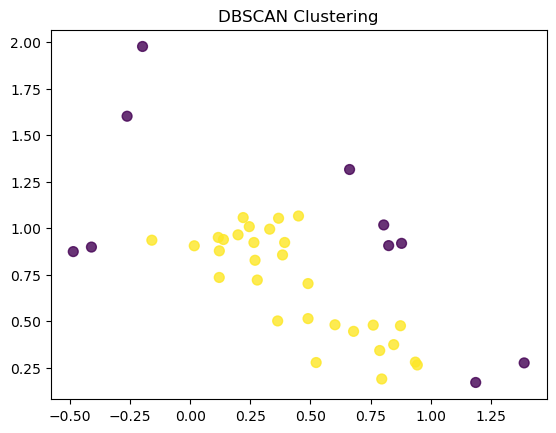

In [571]:
df = pd.DataFrame({'Mass10': mass10, 'Density_norm': density})
dbscan = DBSCAN(eps=0.225, min_samples=4)
labels = dbscan.fit_predict(df)
if -1 in labels and 0 in labels:
    plt.scatter(df['Mass10'],df['Density_norm'], c=labels, cmap='viridis', s=50, alpha=0.8)
    plt.title('DBSCAN Clustering')
    silhouette_avg = silhouette_score(df, labels)
    print(f"Silhouette Score: {silhouette_avg}")
    ch_score = calinski_harabasz_score(df, labels)
    print(f"Calinski-Harabasz Score: {ch_score}")
elif -1 in labels:
    print("No clusters detected")
else:
    print("All planets 1 big cluster")